This notebook is about __Random Forest__ performance in __full phase__

In [1]:
import numpy as np
from models import random_forest_pcc

import data

In [2]:
# estimators here
STATE = np.random.RandomState(seed=1000)
random_forest_pcc.fit(data.x1, data.y)

In [3]:
fitted_models = random_forest_pcc.fitted_
all_columns = data.predictors + data.targets


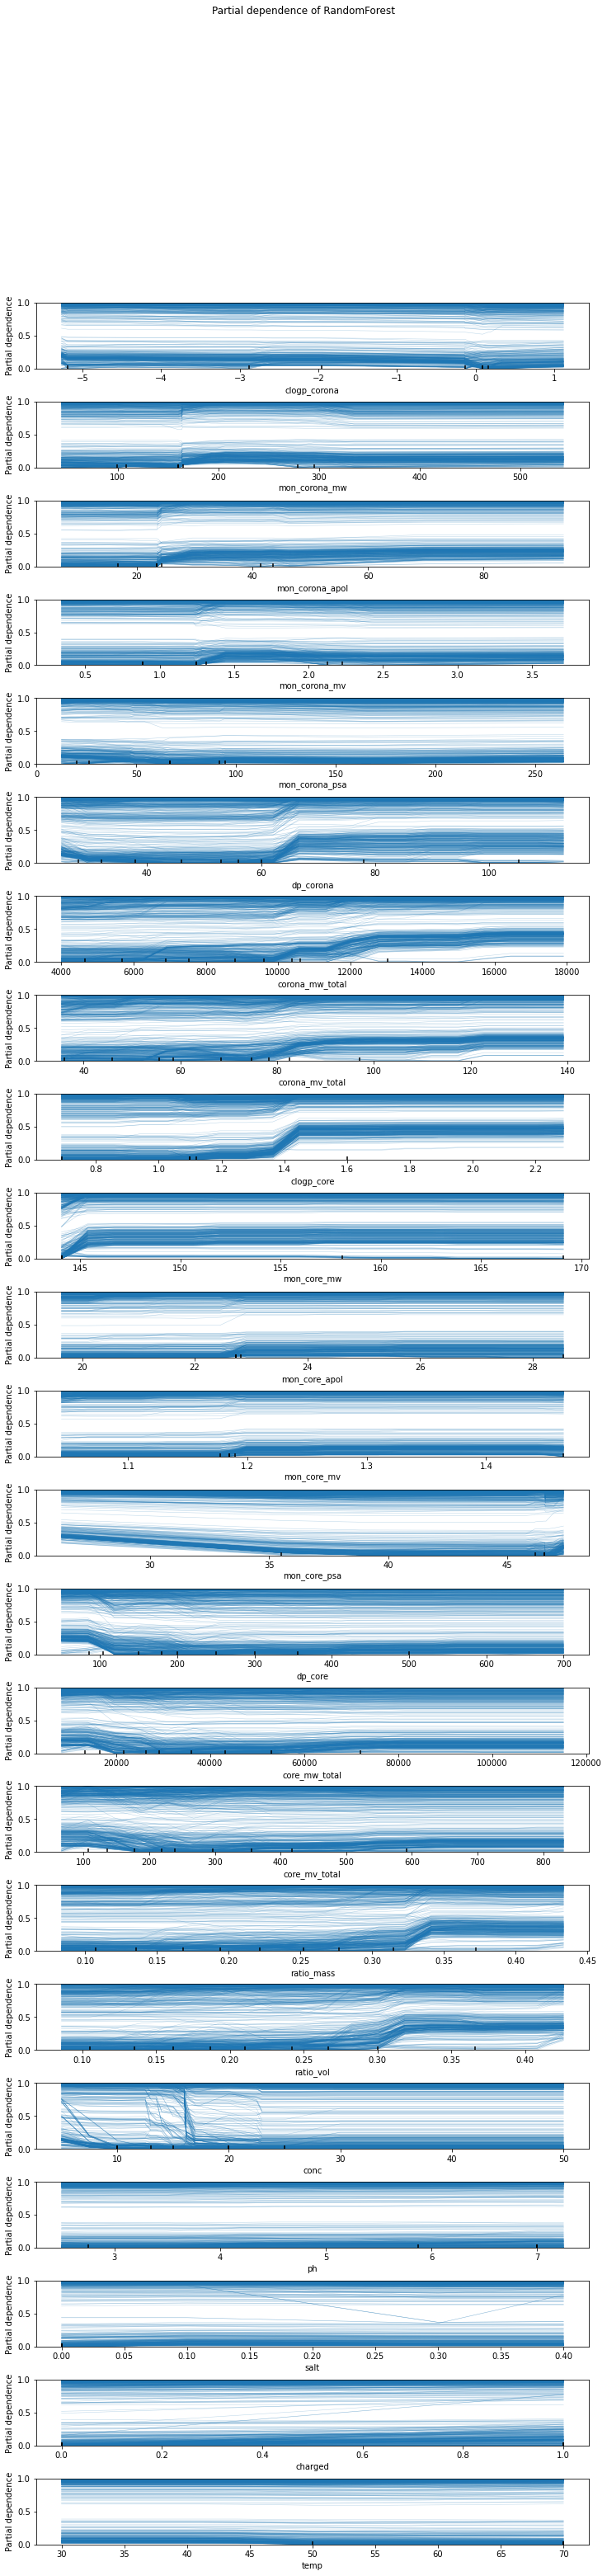

In [4]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

_, ax = plt.subplots(ncols=1, nrows=23, figsize=(12, 50))
common_params = {
    "n_jobs": 12,
    "grid_resolution": 20,
    "centered": False,
}
features = data.x1.columns
display = PartialDependenceDisplay.from_estimator(
                                    fitted_models[0], 
                                    data.x1, 
                                    features, 
                                    kind='individual',
                                    ax=ax,
                                    **common_params)
display.figure_.suptitle(
    "Partial dependence of RandomForest"
)
display.figure_.subplots_adjust(wspace=0, hspace=0.5)

Text(0.5, 1.0, 'Random Forest Feature Importance')

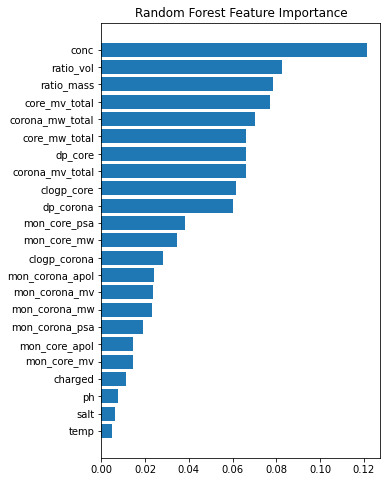

In [7]:
sorted_idx = fitted_models[0].feature_importances_.argsort()
plt.figure(figsize=(5,8))
plt.barh(data.x1.columns[sorted_idx], fitted_models[0].feature_importances_[sorted_idx])
plt.title("Random Forest Feature Importance")

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


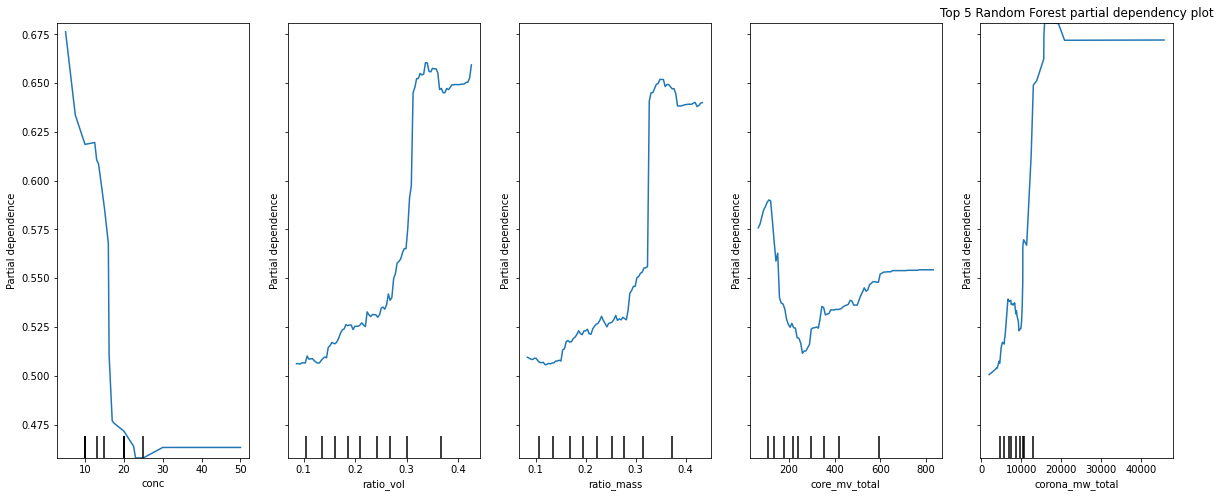

In [6]:
from sklearn.inspection import plot_partial_dependence

order = list(data.x1.columns[sorted_idx])[::-1]
_, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 8), sharey=True)
common_params = {
    "n_jobs": 12,
}
display = plot_partial_dependence(fitted_models[0], 
                        features=order[:5], 
                        X=data.x1,
                        ax=axs,
                        **common_params)

plt.title('Top 5 Random Forest partial dependency plot')
plt.show()